<a href="https://colab.research.google.com/github/BatthulaVinay/Apple-stock/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('laptop_data_cleaned.csv')

df.head()


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna()

In [ ]:
print("\nData Types of each column:")
print(df.dtypes)


Data Types of each column:
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
Os              object
dtype: object


In [ ]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,8.451258,2.041761,10.828035,0.147013,0.279874,146.936126,414.040881,186.298742
std,5.099249,0.669088,0.619774,0.354258,0.449114,42.940459,518.128204,186.597777
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [ ]:
# Convert categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the new shape of the dataset after encoding
print("New dataset shape:", df_encoded.shape)

# Show the first few rows of the encoded dataframe
df_encoded.head()


New dataset shape: (1272, 39)


,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,8,1.37,11.175755,0,1,226.983005,0,128,True,False,...,True,False,False,True,False,False,True,False,False,False
1,8,1.34,10.776777,0,0,127.677940,0,0,True,False,...,True,False,False,True,False,False,True,False,False,False
2,8,1.86,10.329931,0,0,141.211998,0,256,False,False,...,False,False,False,True,False,False,True,False,True,False
3,16,1.83,11.814476,0,1,220.534624,0,512,True,False,...,True,False,False,False,True,False,False,False,False,False
4,8,1.37,11.473101,0,1,226.983005,0,256,True,False,...,True,False,False,True,False,False,True,False,False,False


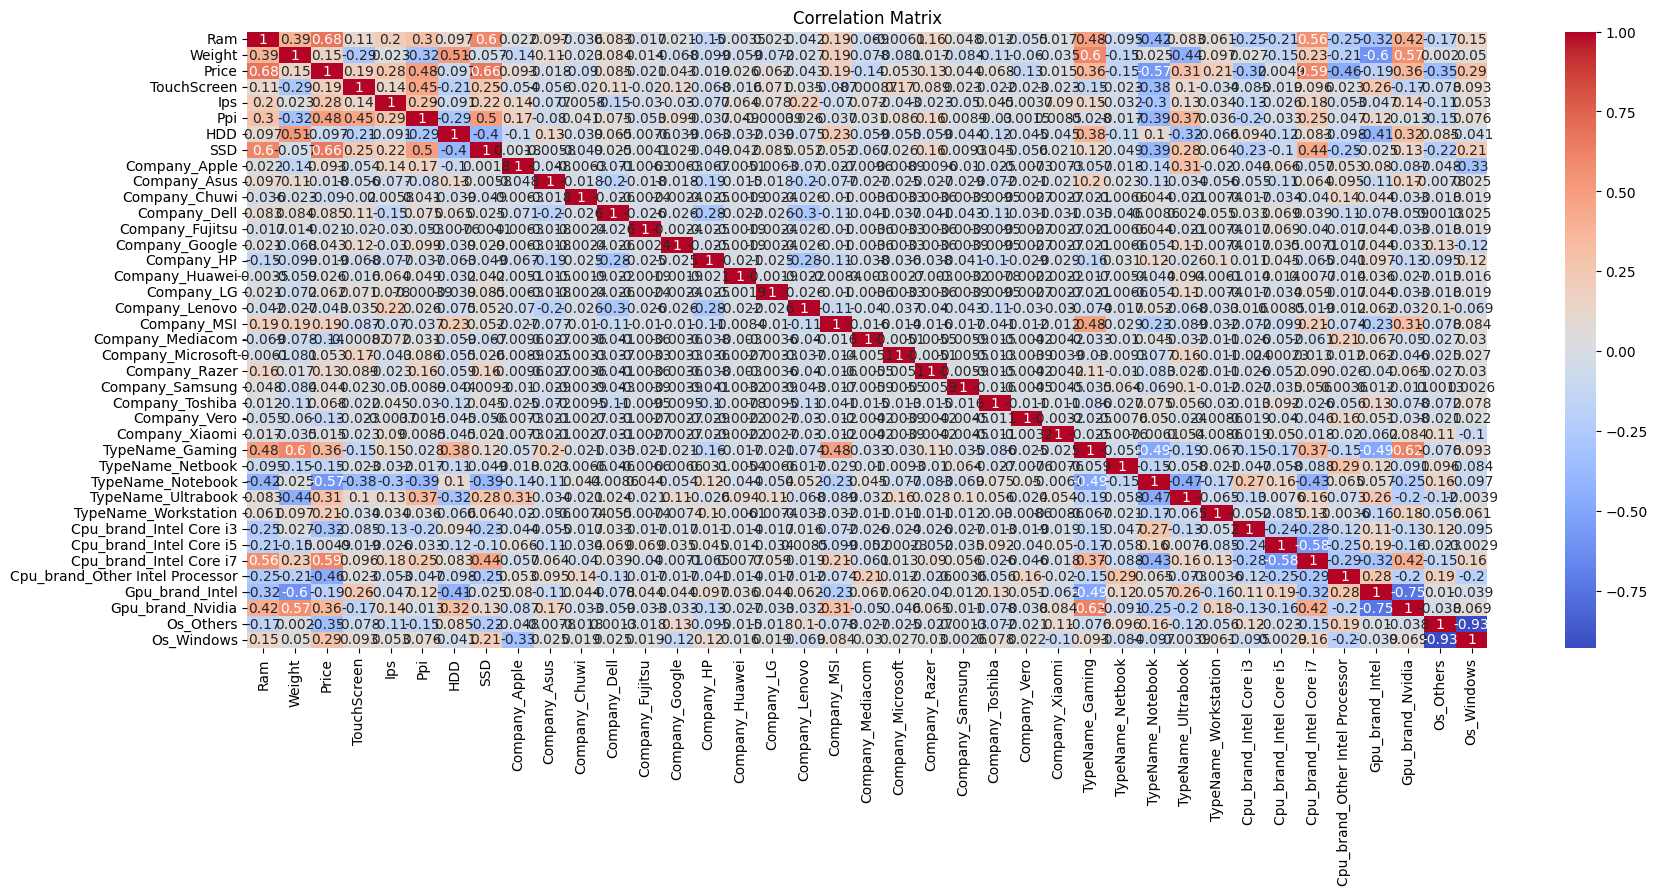

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

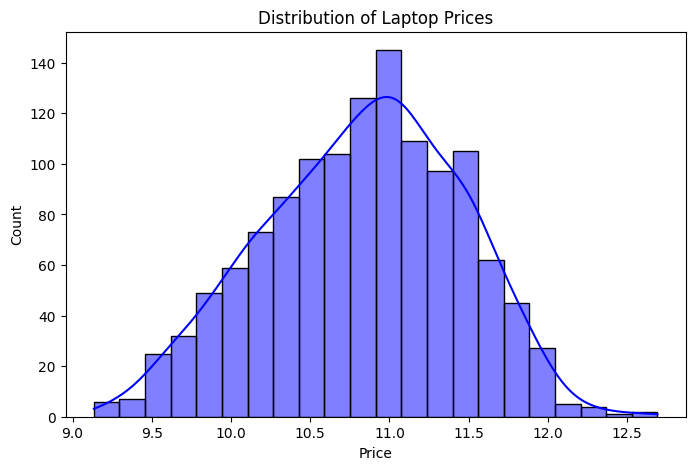

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of Laptop Prices')
plt.show()

In [ ]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5].values)


Predicted values: [11.25358071 10.65326926 11.20185328 10.7624907   9.78752278]
Actual values: [11.25418997 10.69094441 11.23865235 11.06480418  9.66253638]


In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.04469416697412403
Root Mean Squared Error: 0.21140995003576352
R² Score: 0.8789101101272623


In [ ]:
error=abs(y_test-y_pred)
mean=error/y_test
per=100-np.mean(mean)
print(per)

99.98512377873737


#Prediction of Laptop price with 99.98 Accuracy